In [1]:
# 'date' : '일자', 
# 'year' : '연도', 
# 'month' : '월', 
# 'day' : '일', 
# 'season' : '계절', 
# 'region' : '지역', 
# 'wholesale_market' : '도매시장',
# 'category' : '부류',  
# 'item' : '품목',  
# 'quantity_kg' : '총물량(kg)',  
# 'price_won' : '총금액(원)',  
# 'unit_price_per_kg' : '총단가(원/kg)', 
# 'avg_quantity_kg' : '평균물량(kg)',  
# 'avg_price_won' : '평균금액(원)',  
# 'avg_unit_price_per_kg' : '평균단가(원/kg)',  
# 'avg_temp' : '평균기온(°C)', 
# 'min_temp' : '최저기온(°C)', 
# 'max_temp' : '최고기온(°C)', 
# 'daily_rainfall' : '일강수량(mm)',  
# 'max_wind' : '최대 풍속(m/s)',  
# 'avg_wind' : '평균 풍속(m/s)', 
# 'avg_humidity' : '평균 상대습도(%)',  
# 'avg_pressure' : '평균 현지기압(hPa)',  
# 'sunshine_hours' : '합계 일조시간(hr)',  
# 'max_snow_depth' : '일 최심신적설(cm)'

In [2]:
import os
import pandas as pd

# 폴더 경로
folder_path = "../data/processed/auction_weather"

# 폴더 내의 CSV 파일 가져오기
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# CSV 파일 읽고 합치기
dataframes = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# 하나의 DataFrame으로 합치기
combined_df = pd.concat(dataframes, ignore_index=True)

In [3]:
print(combined_df.info())  
print(combined_df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5641136 entries, 0 to 5641135
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   object 
 1   year                   int64  
 2   month                  int64  
 3   day                    int64  
 4   season                 object 
 5   region                 object 
 6   wholesale_market       object 
 7   category               object 
 8   item                   object 
 9   quantity_kg            float64
 10  price_won              float64
 11  unit_price_per_kg      float64
 12  avg_quantity_kg        float64
 13  avg_price_won          float64
 14  avg_unit_price_per_kg  float64
 15  avg_temp               float64
 16  min_temp               float64
 17  max_temp               float64
 18  daily_rainfall         float64
 19  max_wind               float64
 20  avg_wind               float64
 21  avg_humidity           float64
 22  avg_pressure      

In [4]:
# 품목별 총물량(kg) 합계를 기준으로 상위 30개 품목 선정
top_items = combined_df.groupby('item')['quantity_kg'].sum().nlargest(30).index

# 상위 30개 품목만 포함
filtered_df = combined_df[combined_df['item'].isin(top_items)]

print(f"선택된 상위 30개 품목: {top_items.tolist()}")

선택된 상위 30개 품목: ['양파', '무', '배추', '사과', '오이', '수박', '감자', '대파', '감귤', '양배추', '호박', '바나나', '고구마', '토마토', '당근', '포도', '얼갈이배추', '배', '풋고추', '복숭아', '참외', '딸기', '상추', '방울토마토', '열무', '새송이', '부추', '단감', '시금치', '마늘']


In [5]:
filtered_df.columns

Index(['date', 'year', 'month', 'day', 'season', 'region', 'wholesale_market',
       'category', 'item', 'quantity_kg', 'price_won', 'unit_price_per_kg',
       'avg_quantity_kg', 'avg_price_won', 'avg_unit_price_per_kg', 'avg_temp',
       'min_temp', 'max_temp', 'daily_rainfall', 'max_wind', 'avg_wind',
       'avg_humidity', 'avg_pressure', 'sunshine_hours', 'max_snow_depth'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

In [8]:
#날씨와 총물량(kg)(quantity_kg)의 상관관계
weather_columns = ['avg_temp', 'min_temp', 'max_temp', 'daily_rainfall', 'max_wind', 'avg_wind', 'avg_humidity', 'avg_pressure', 'sunshine_hours', 'max_snow_depth']

correlation_matrix = filtered_df[['quantity_kg'] + weather_columns].corr()
print(correlation_matrix['quantity_kg'].sort_values(ascending=False))


quantity_kg       1.000000
avg_wind          0.071056
max_wind          0.039378
min_temp          0.019468
avg_temp          0.014972
max_temp          0.009802
max_snow_depth    0.009160
sunshine_hours   -0.000051
daily_rainfall   -0.001927
avg_humidity     -0.026469
avg_pressure     -0.044391
Name: quantity_kg, dtype: float64


In [9]:
# 날씨 패턴별 분석

high_temp_df = filtered_df[filtered_df['avg_temp'] > 30]  # 평균기온 30도 이상
low_temp_df = filtered_df[filtered_df['avg_temp'] < 10]  # 평균기온 10도 이하
print(f"고온일 평균 총물량(kg): {high_temp_df['quantity_kg'].mean()}")
print(f"저온일 평균 총물량(kg): {low_temp_df['quantity_kg'].mean()}")

고온일 평균 총물량(kg): 22696.156545129073
저온일 평균 총물량(kg): 16952.902779835316


In [10]:
# 고온일 때 특정 품목 거래가 더 활발하다

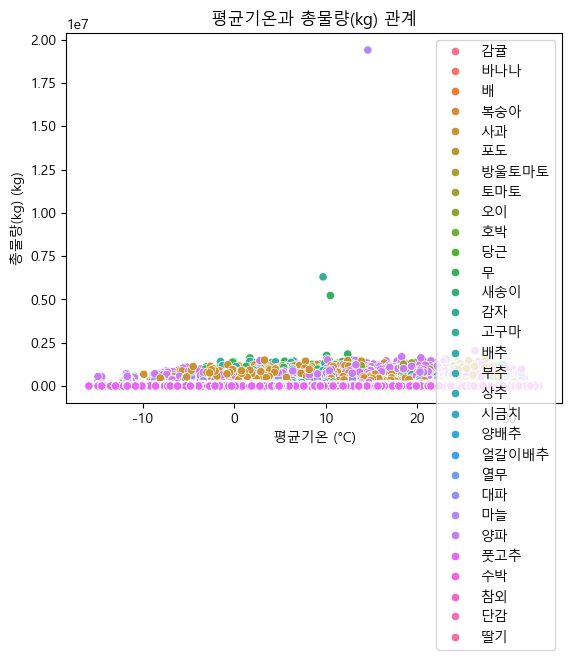

In [11]:
sns.scatterplot(data=filtered_df, x='avg_temp', y='quantity_kg', hue='item')
plt.title('평균기온과 총물량(kg) 관계')
plt.xlabel('평균기온 (°C)')
plt.ylabel('총물량(kg) (kg)')
plt.legend(loc='upper right')
plt.show()

In [12]:
# 품목별 고온/저온 영향 분석

high_temp_items = filtered_df[filtered_df['avg_temp'] > 30].groupby('item')['quantity_kg'].mean()
low_temp_items = filtered_df[filtered_df['avg_temp'] < 10].groupby('item')['quantity_kg'].mean()

temp_comparison = pd.DataFrame({'고온 총물량(kg)': high_temp_items, '저온 총물량(kg)': low_temp_items}).reset_index()
temp_comparison['변화율'] = ((temp_comparison['고온 총물량(kg)'] - temp_comparison['저온 총물량(kg)']) / temp_comparison['저온 총물량(kg)']) * 100

print(temp_comparison)


     item    고온 총물량(kg)    저온 총물량(kg)          변화율
0      감귤   3084.944800  42569.393636   -92.753139
1      감자  22065.839426  18993.512019    16.175668
2     고구마  11264.780912  16304.569522   -30.910283
3      단감    117.125000   8136.247513   -98.560454
4      당근  14262.843855  12867.723516    10.842014
5      대파  25718.663985  24094.877311     6.739137
6      딸기    202.547143  13018.487980   -98.444158
7      마늘   3911.497594   3754.716935     4.175565
8       무  53227.293272  53843.815182    -1.145019
9     바나나  16435.321901  14717.642801    11.670885
10  방울토마토   7567.469152   4906.726769    54.226422
11      배   5821.982143  12860.891232   -54.731114
12     배추  41786.022715  39824.201241     4.926204
13    복숭아  61557.304348    656.283102  9279.687533
14     부추   7037.853959   5198.075132    35.393464
15     사과  13050.987068  37387.358811   -65.092514
16     상추   7953.941003   6287.724294    26.499519
17    새송이   7977.001362   5940.843663    34.273881
18     수박  74235.594602   2588.

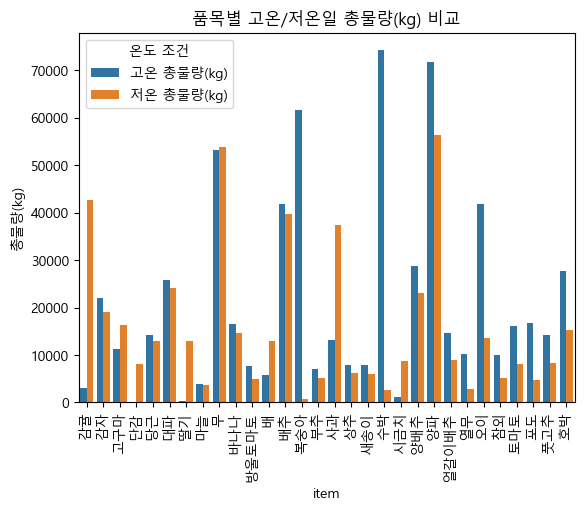

In [13]:
temp_comparison_melted = pd.melt(temp_comparison, id_vars=['item'], value_vars=['고온 총물량(kg)', '저온 총물량(kg)'], var_name='온도 조건', value_name='총물량(kg)')
sns.barplot(data=temp_comparison_melted, x='item', y='총물량(kg)', hue='온도 조건')
plt.title('품목별 고온/저온일 총물량(kg) 비교')
plt.xticks(rotation=90)
plt.show()

In [14]:
# 복숭아, 수박, 포도, 오이, 참외 등은 고온일에 거래량이 크게 증가하는 경향
# 복숭아는 고온에서 거의 거래 독점
# 감귤, 딸기, 시금치, 사과 등은 저온일에 거래량이 높음
# 대파, 배추, 무 등은 고온/저온의 영향을 크게 받지 않음

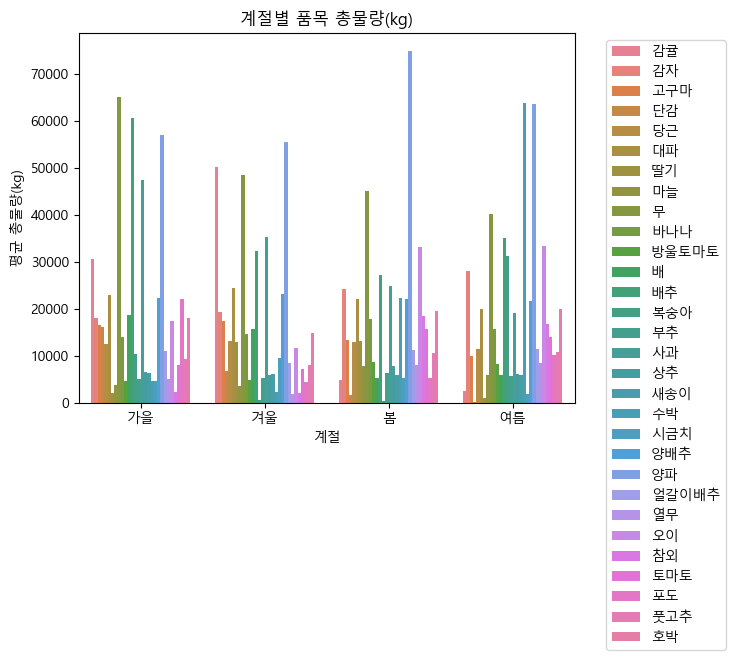

In [15]:
# 계절별 품목 총물량(kg)

seasonal_data = filtered_df.groupby(['season', 'item'])['quantity_kg'].mean().reset_index()
sns.barplot(data=seasonal_data, x='season', y='quantity_kg', hue='item')
plt.title('계절별 품목 총물량(kg)')
plt.xlabel('계절')
plt.ylabel('평균 총물량(kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [16]:
# 날씨 변수 상관관계

item_correlations = {}
for item in filtered_df['item'].unique():
    item_data = filtered_df[filtered_df['item'] == item]
    corr = item_data[['quantity_kg', 'avg_temp', 'daily_rainfall', 'sunshine_hours']].corr()
    item_correlations[item] = corr['quantity_kg']

for item, corr in item_correlations.items():
    print(f"{item}의 상관계수:\n{corr}\n")


감귤의 상관계수:
quantity_kg       1.000000
avg_temp         -0.343080
daily_rainfall   -0.069572
sunshine_hours   -0.003154
Name: quantity_kg, dtype: float64

바나나의 상관계수:
quantity_kg       1.000000
avg_temp          0.013617
daily_rainfall   -0.002570
sunshine_hours    0.007276
Name: quantity_kg, dtype: float64

배의 상관계수:
quantity_kg       1.000000
avg_temp         -0.017973
daily_rainfall   -0.000190
sunshine_hours   -0.040104
Name: quantity_kg, dtype: float64

복숭아의 상관계수:
quantity_kg       1.000000
avg_temp          0.246904
daily_rainfall    0.048966
sunshine_hours   -0.072280
Name: quantity_kg, dtype: float64

사과의 상관계수:
quantity_kg       1.000000
avg_temp         -0.051814
daily_rainfall   -0.019439
sunshine_hours   -0.001266
Name: quantity_kg, dtype: float64

포도의 상관계수:
quantity_kg       1.000000
avg_temp          0.189931
daily_rainfall    0.032430
sunshine_hours   -0.042687
Name: quantity_kg, dtype: float64

방울토마토의 상관계수:
quantity_kg       1.000000
avg_temp          0.082121
daily_rainfall

In [17]:
# 수박, 복숭아, 포도, 열무, 오이 등은 평균기온(avg_temp)과 높은 양의 상관관계. 고온일에 총물량(kg) 증가
# 감귤, 시금치, 딸기 등은 평균기온과 음의 상관관계. 저온일에 총물량(kg) 증가

# 대부분 강수량과는 거의 무관

# 참외, 단감 등은 일조시간(sunshine_hours)과 약한 양의 상관관계이므로 일조시간 증가할수록 총물량(kg) 증가 가능성 있음
# 대부분 일조시간이 큰 영향은 미치지 않음

In [18]:
correlation_data = []

for item, corr in item_correlations.items():
    correlation_data.append({
        'item': item,
        'avg_temp': corr['avg_temp'],
        'daily_rainfall': corr['daily_rainfall'],
        'sunshine_hours': corr['sunshine_hours']
    })

correlation_df = pd.DataFrame(correlation_data)

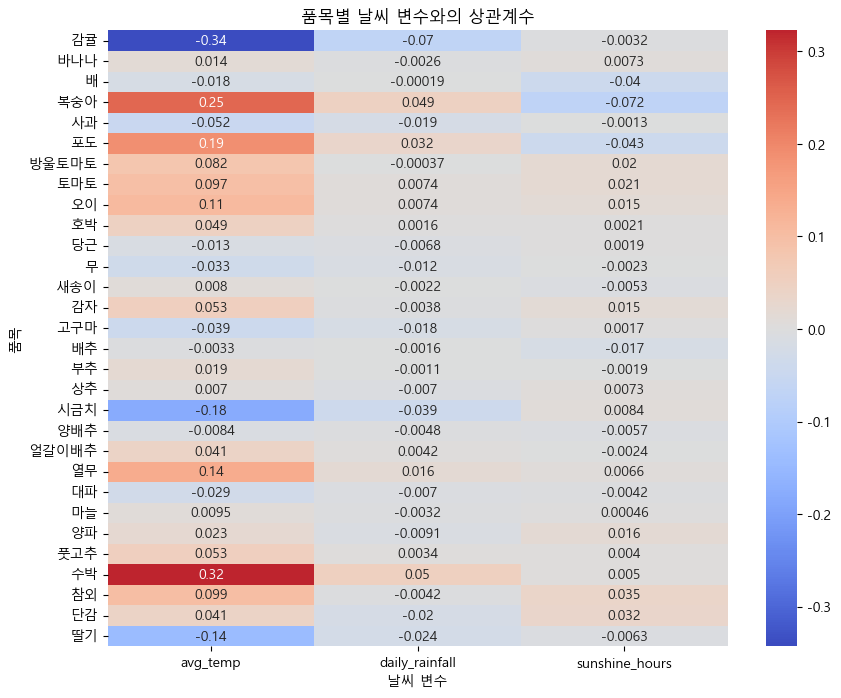

In [19]:
pivot_data = correlation_df.set_index('item')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', center=0)
plt.title('품목별 날씨 변수와의 상관계수')
plt.xlabel('날씨 변수')
plt.ylabel('품목')
plt.show()

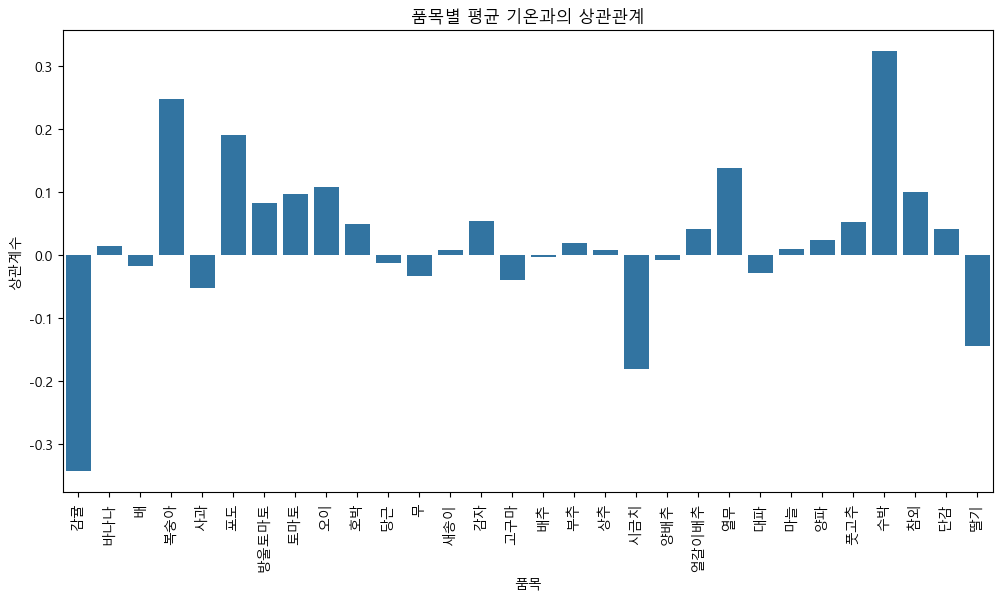

In [20]:
# 특정 날씨 변수와 품목별 상관관계
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, x='item', y='avg_temp')
plt.title('품목별 평균 기온과의 상관관계')
plt.xticks(rotation=90)
plt.xlabel('품목')
plt.ylabel('상관계수')
plt.show()

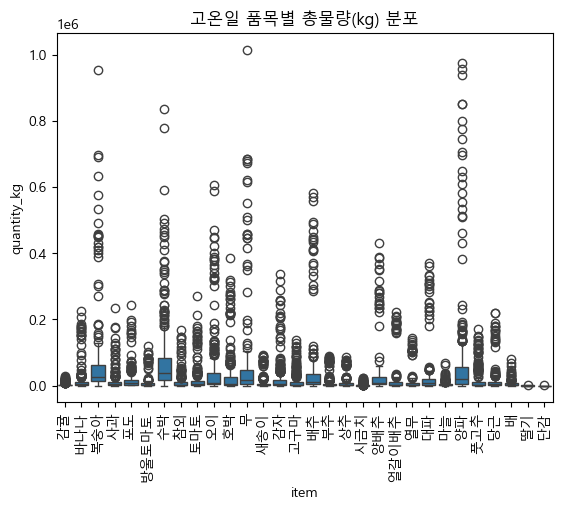

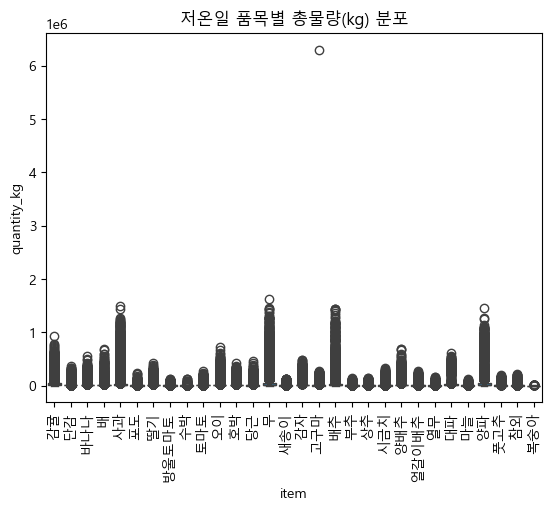

In [21]:
sns.boxplot(data=filtered_df[filtered_df['avg_temp'] > 30], x='item', y='quantity_kg')
plt.title('고온일 품목별 총물량(kg) 분포')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=filtered_df[filtered_df['avg_temp'] < 10], x='item', y='quantity_kg')
plt.title('저온일 품목별 총물량(kg) 분포')
plt.xticks(rotation=90)
plt.show()


In [22]:
print(filtered_df[['quantity_kg', 'unit_price_per_kg', 'avg_temp', 'daily_rainfall', 'sunshine_hours']].describe())


        quantity_kg  unit_price_per_kg      avg_temp  daily_rainfall  \
count  1.529912e+06       1.529912e+06  1.529912e+06    1.529912e+06   
mean   1.808093e+04       2.894996e+03  1.433394e+01    4.052449e+00   
std    5.988127e+04       3.193571e+03  9.578956e+00    1.516454e+01   
min    1.000000e-02       3.750000e+00 -1.590000e+01    0.000000e+00   
25%    1.132000e+03       1.246280e+03  6.600000e+00    0.000000e+00   
50%    4.198000e+03       2.143210e+03  1.510000e+01    0.000000e+00   
75%    1.339500e+04       3.606648e+03  2.270000e+01    3.000000e-01   
max    1.940679e+07       1.186800e+06  3.340000e+01    3.977000e+02   

       sunshine_hours  
count    1.529912e+06  
mean     6.496810e+00  
std      3.960066e+00  
min      0.000000e+00  
25%      3.000000e+00  
50%      7.500000e+00  
75%      9.600000e+00  
max      1.410000e+01  


In [23]:
# 날씨 조건별 데이터 그룹화
weather_groups = filtered_df.groupby(pd.cut(filtered_df['avg_temp'], bins=[-10, 0, 10, 20, 30, 40])).agg({
    'quantity_kg': 'mean',
    'unit_price_per_kg': 'mean'
}).reset_index()

print(weather_groups)


   avg_temp   quantity_kg  unit_price_per_kg
0  (-10, 0]  18331.837184        3178.428872
1   (0, 10]  16565.665077        3057.925528
2  (10, 20]  17759.679168        2788.565916
3  (20, 30]  19432.637191        2794.545481
4  (30, 40]  22696.156545        2883.473010


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10080\1366222018.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_groups = filtered_df.groupby(pd.cut(filtered_df['avg_temp'], bins=[-10, 0, 10, 20, 30, 40])).agg({


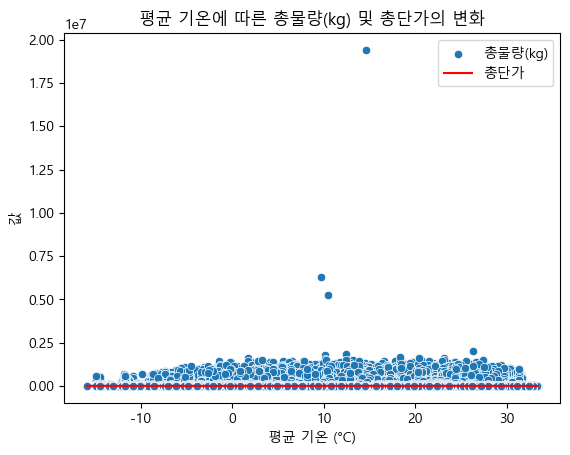

In [24]:
# 평균 기온에 따른 거래량과 총단가의 관계
sns.scatterplot(data=filtered_df, x='avg_temp', y='quantity_kg', label='총물량(kg)')
sns.lineplot(data=filtered_df, x='avg_temp', y='unit_price_per_kg', color='red', label='총단가')
plt.title('평균 기온에 따른 총물량(kg) 및 총단가의 변화')
plt.xlabel('평균 기온 (°C)')
plt.ylabel('값')

plt.legend(loc='upper right')
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10080\3137193026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'log_quantity_kg'] = np.log1p(filtered_df['quantity_kg'])  # 0 처리 포함


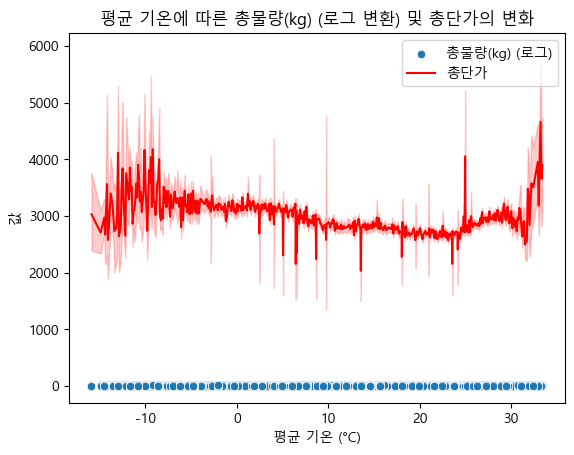

In [25]:
# 총물량(kg) 데이터를 로그 변환
filtered_df.loc[:, 'log_quantity_kg'] = np.log1p(filtered_df['quantity_kg'])  # 0 처리 포함

sns.scatterplot(data=filtered_df, x='avg_temp', y='log_quantity_kg', label='총물량(kg) (로그)')
sns.lineplot(data=filtered_df, x='avg_temp', y='unit_price_per_kg', color='red', label='총단가')

plt.title('평균 기온에 따른 총물량(kg) (로그 변환) 및 총단가의 변화')
plt.xlabel('평균 기온 (°C)')
plt.ylabel('값')

plt.legend(loc='upper right')  # 범례 위치를 수동으로 지정
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10080\2137093589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'scaled_quantity_kg'] = scaler.fit_transform(filtered_df[['quantity_kg']])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10080\2137093589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'scaled_unit_price_per_kg'] = scaler.fit_transform(filtered_df[['unit_price_per_kg']])


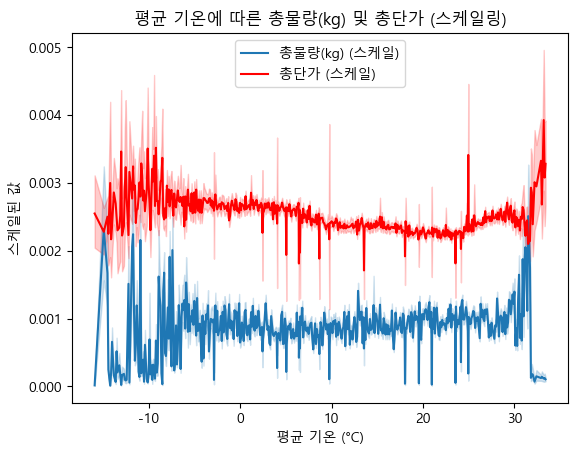

In [26]:
# 정규화 : 데이터를 0~1 사이로 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

filtered_df.loc[:, 'scaled_quantity_kg'] = scaler.fit_transform(filtered_df[['quantity_kg']])
filtered_df.loc[:, 'scaled_unit_price_per_kg'] = scaler.fit_transform(filtered_df[['unit_price_per_kg']])

sns.lineplot(data=filtered_df, x='avg_temp', y='scaled_quantity_kg', label='총물량(kg) (스케일)')
sns.lineplot(data=filtered_df, x='avg_temp', y='scaled_unit_price_per_kg', color='red', label='총단가 (스케일)')
plt.title('평균 기온에 따른 총물량(kg) 및 총단가 (스케일링)')
plt.xlabel('평균 기온 (°C)')
plt.ylabel('스케일된 값')
plt.legend()
plt.show()

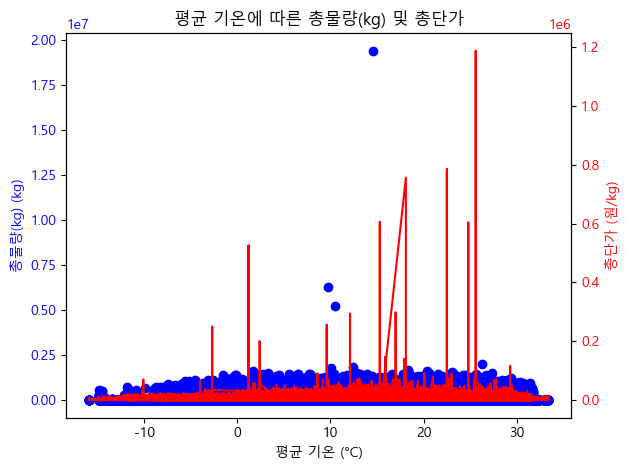

In [27]:
# 거래량과 단가를 서로 다른 y축에 표시하여 스케일 차이 극복
fig, ax1 = plt.subplots()

# 총물량(kg) (왼쪽 y축)
ax1.set_xlabel('평균 기온 (°C)')
ax1.set_ylabel('총물량(kg) (kg)', color='blue')
ax1.scatter(filtered_df['avg_temp'], filtered_df['quantity_kg'], color='blue', label='총물량(kg)')
ax1.tick_params(axis='y', labelcolor='blue')

# 단가 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.set_ylabel('총단가 (원/kg)', color='red')
ax2.plot(filtered_df['avg_temp'], filtered_df['unit_price_per_kg'], color='red', label='총단가')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('평균 기온에 따른 총물량(kg) 및 총단가')
fig.tight_layout()
plt.show()


In [28]:
# 거래량이 특정 기온에서 급격히 증가는 하는데, 단가에 명확한 영향을 미치는 것 같지는 않아보임
# 이상치 데이터 존재 가능성

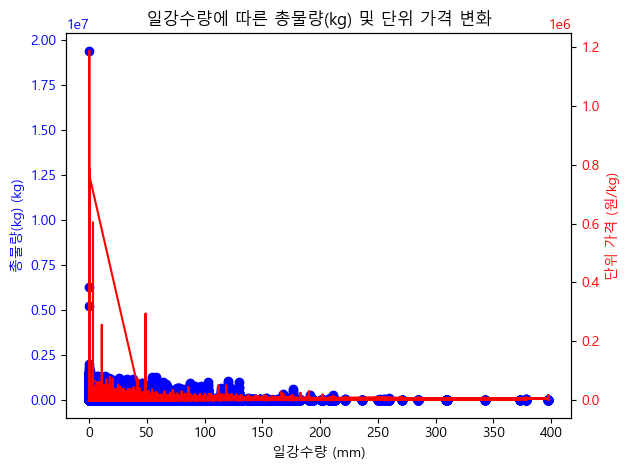

In [29]:
# 강수량이 증가할 때 거래량과 단위 가격의 변화
fig, ax1 = plt.subplots()

# 첫 번째 y축: 총물량(kg)
ax1.set_xlabel('일강수량 (mm)')
ax1.set_ylabel('총물량(kg) (kg)', color='blue')
ax1.scatter(filtered_df.loc[:, 'daily_rainfall'], filtered_df.loc[:, 'quantity_kg'], color='blue', label='총물량(kg)')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: 단위 가격
ax2 = ax1.twinx()
ax2.set_ylabel('단위 가격 (원/kg)', color='red')
ax2.plot(filtered_df.loc[:, 'daily_rainfall'], filtered_df.loc[:, 'unit_price_per_kg'], color='red', label='단위 가격')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('일강수량에 따른 총물량(kg) 및 단위 가격 변화')
fig.tight_layout() 
plt.show()

In [30]:
# 강수량 적을 때는 거래량과 가격이 안정적인데 많아지면 불안정성 증가
# 강수량이 생산, 유통 등에 영향을 미칠 수도 있음

상관계수:
                    quantity_kg  unit_price_per_kg  avg_temp  daily_rainfall  \
quantity_kg           1.000000          -0.094011  0.014972       -0.001927   
unit_price_per_kg    -0.094011           1.000000 -0.039257       -0.004396   
avg_temp              0.014972          -0.039257  1.000000        0.169074   
daily_rainfall       -0.001927          -0.004396  0.169074        1.000000   
sunshine_hours       -0.000051          -0.011363 -0.030031       -0.358704   

                   sunshine_hours  
quantity_kg             -0.000051  
unit_price_per_kg       -0.011363  
avg_temp                -0.030031  
daily_rainfall          -0.358704  
sunshine_hours           1.000000  


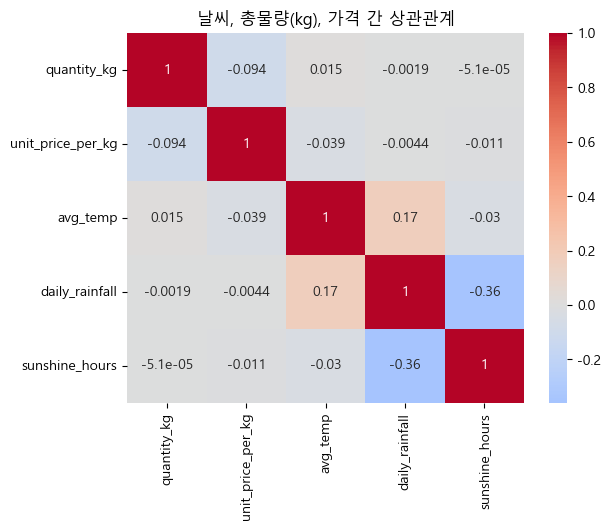

In [31]:
# 날씨 변수와 총물량(kg), 가격 간 상관관계
correlation_matrix = filtered_df[['quantity_kg', 'unit_price_per_kg', 'avg_temp', 'daily_rainfall', 'sunshine_hours']].corr()
print("상관계수:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('날씨, 총물량(kg), 가격 간 상관관계')
plt.show()


In [32]:
# 고온일, 저온일, 적정온도별로 거래량과 가격의 상관관계
high_temp = filtered_df[filtered_df['avg_temp'] > 30]
low_temp = filtered_df[filtered_df['avg_temp'] < 10]

print("고온일 상관계수:\n", high_temp[['quantity_kg', 'unit_price_per_kg']].corr())
print("저온일 상관계수:\n", low_temp[['quantity_kg', 'unit_price_per_kg']].corr())


고온일 상관계수:
                    quantity_kg  unit_price_per_kg
quantity_kg           1.000000          -0.146155
unit_price_per_kg    -0.146155           1.000000
저온일 상관계수:
                    quantity_kg  unit_price_per_kg
quantity_kg           1.000000          -0.101626
unit_price_per_kg    -0.101626           1.000000


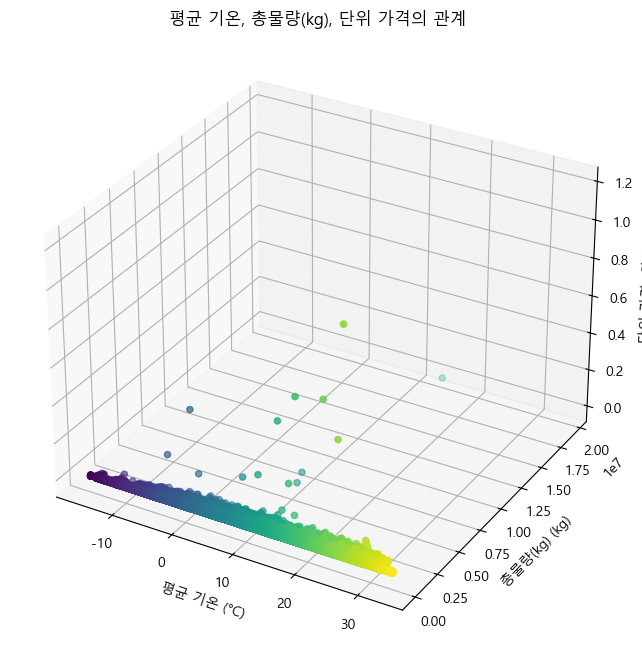

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(filtered_df['avg_temp'], filtered_df['quantity_kg'], filtered_df['unit_price_per_kg'], c=filtered_df['avg_temp'], cmap='viridis')
ax.set_xlabel('평균 기온 (°C)')
ax.set_ylabel('총물량(kg) (kg)')
ax.set_zlabel('단위 가격 (원/kg)')
plt.title('평균 기온, 총물량(kg), 단위 가격의 관계')
plt.show()


In [34]:
filtered_df['date'].dtype

dtype('O')

In [35]:
print(filtered_df['date'].unique())

# 데이터 유형별 분포
print(filtered_df['date'].apply(type).value_counts())


['2019-09-02' '2019-09-03' '2019-09-04' ... '2024-02-12' '2024-02-04'
 '2024-01-01']
date
<class 'str'>    1529912
Name: count, dtype: int64


In [36]:
print(filtered_df['date'].isnull().sum())

0


In [37]:
filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='coerce')
print(filtered_df['date'].dtype)  # datetime64[ns] 확인

datetime64[ns]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10080\1331015432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='coerce')


In [38]:
# 연도 추출
filtered_df['year'] = filtered_df['date'].dt.year

# 결과 확인
print(filtered_df[['date', 'year']].head())


        date  year
0 2019-09-02  2019
3 2019-09-02  2019
4 2019-09-02  2019
5 2019-09-02  2019
6 2019-09-02  2019


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10080\2871227857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['date'].dt.year


In [39]:
filtered_df['date'].dtype

dtype('<M8[ns]')

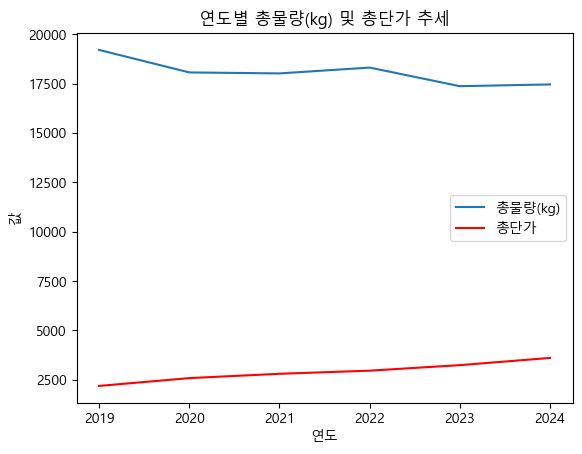

In [40]:
# 연도별 총물량(kg) 추세 분석
filtered_df.loc[:, 'year'] = filtered_df['date'].dt.year  # 연도 추출
yearly_data = filtered_df.groupby('year')[['quantity_kg', 'unit_price_per_kg']].mean().reset_index()

sns.lineplot(data=yearly_data, x='year', y='quantity_kg', label='총물량(kg)')
sns.lineplot(data=yearly_data, x='year', y='unit_price_per_kg', label='총단가', color='red')
plt.title('연도별 총물량(kg) 및 총단가 추세')
plt.xlabel('연도')
plt.ylabel('값')
plt.legend()
plt.show()

In [41]:
# 거래량과 관계 없이 총단가는 상승

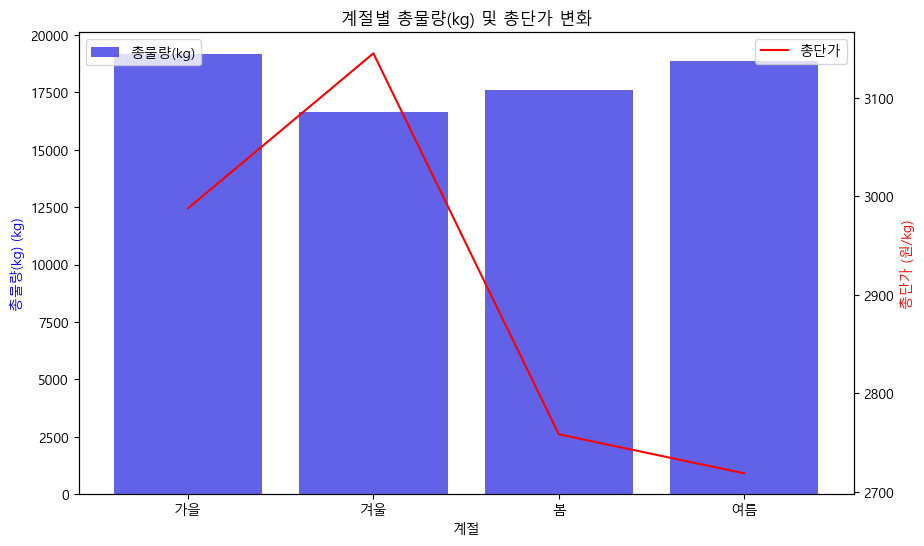

In [42]:
# 계절별 총물량(kg) 및 총단가 평균 계산
seasonal_data = filtered_df.groupby(filtered_df.loc[:, 'season'])[['quantity_kg', 'unit_price_per_kg']].mean().reset_index()

# 시각화: 계절별 거래량과 총단가 변화
plt.figure(figsize=(10, 6))

# 계절별 총물량(kg) 시각화
sns.barplot(data=seasonal_data, x='season', y='quantity_kg', color='blue', alpha=0.7, label='총물량(kg)')

# 계절별 총단가 시각화 (이중 축)
ax1 = plt.gca()
ax2 = ax1.twinx()
sns.lineplot(data=seasonal_data, x='season', y='unit_price_per_kg', ax=ax2, color='red', label='총단가')

# 제목 및 축 레이블 설정
ax1.set_title('계절별 총물량(kg) 및 총단가 변화')
ax1.set_xlabel('계절')
ax1.set_ylabel('총물량(kg) (kg)', color='blue')
ax2.set_ylabel('총단가 (원/kg)', color='red')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


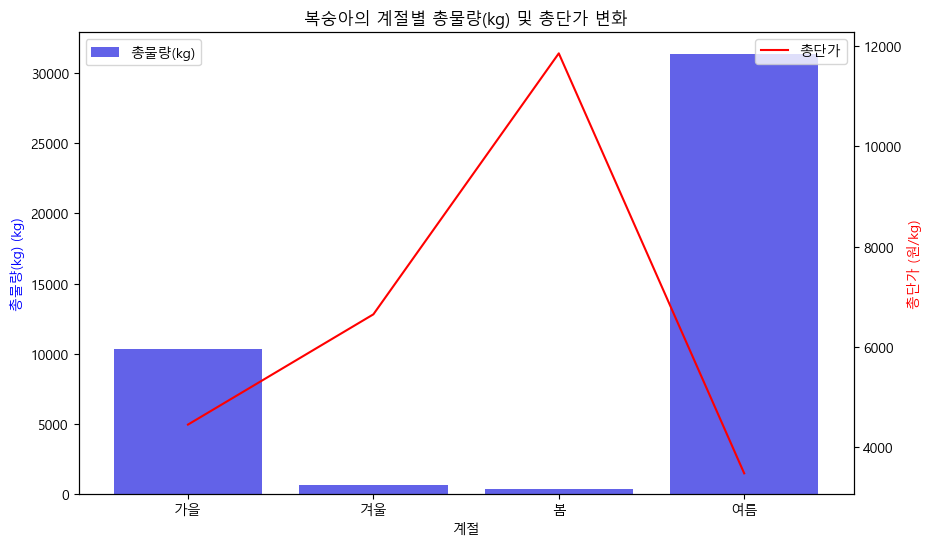

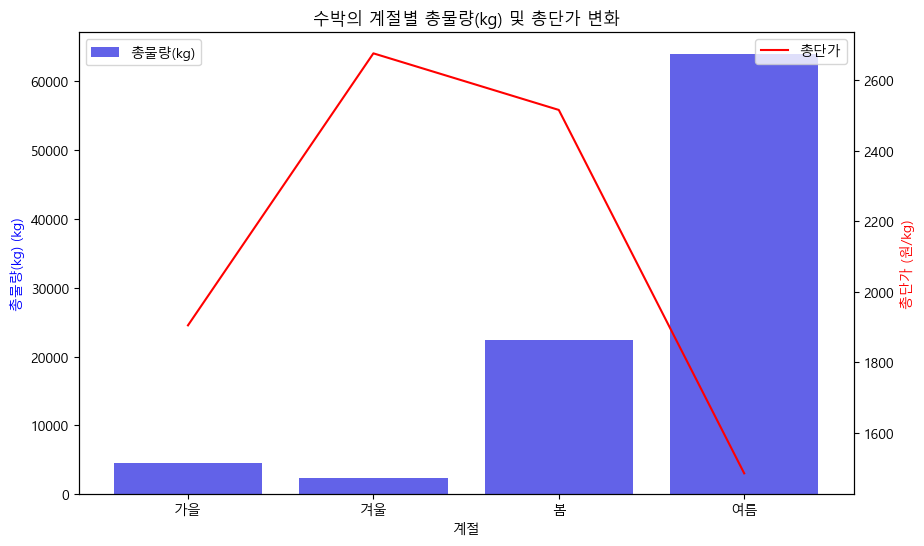

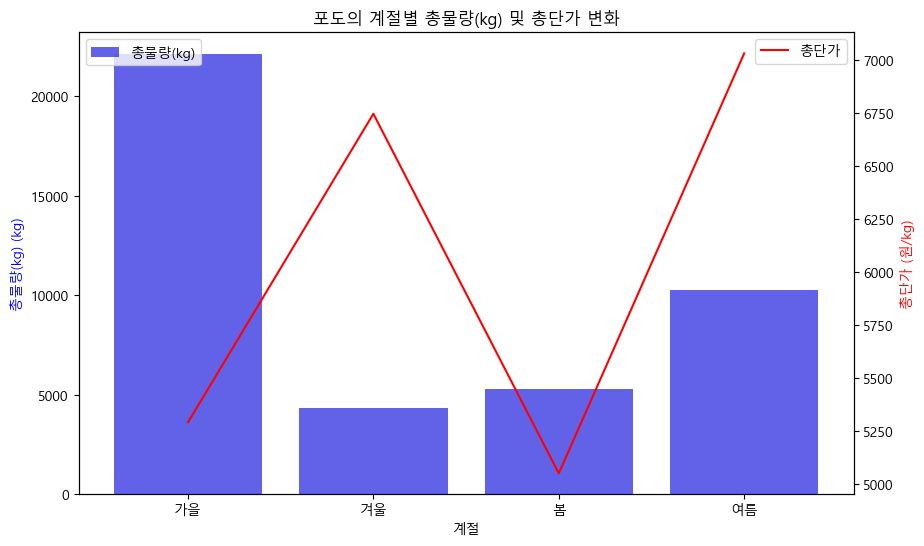

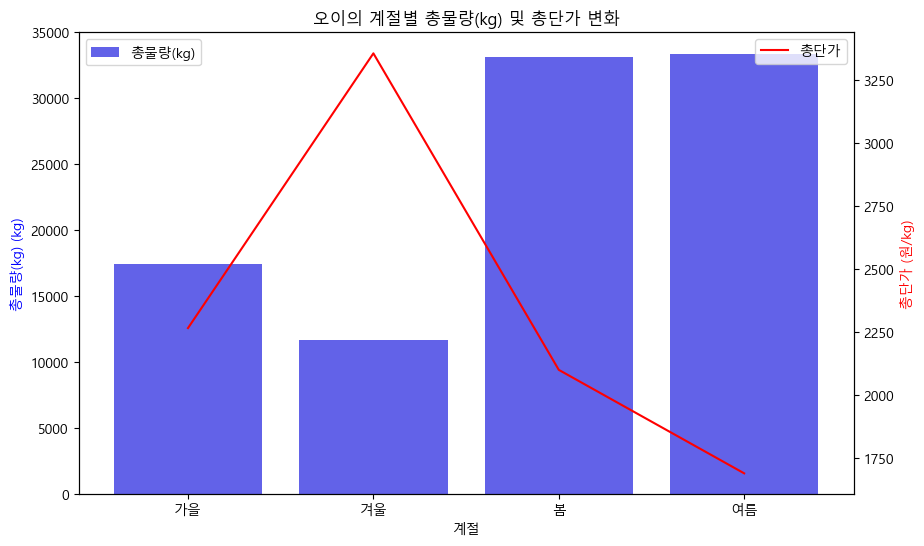

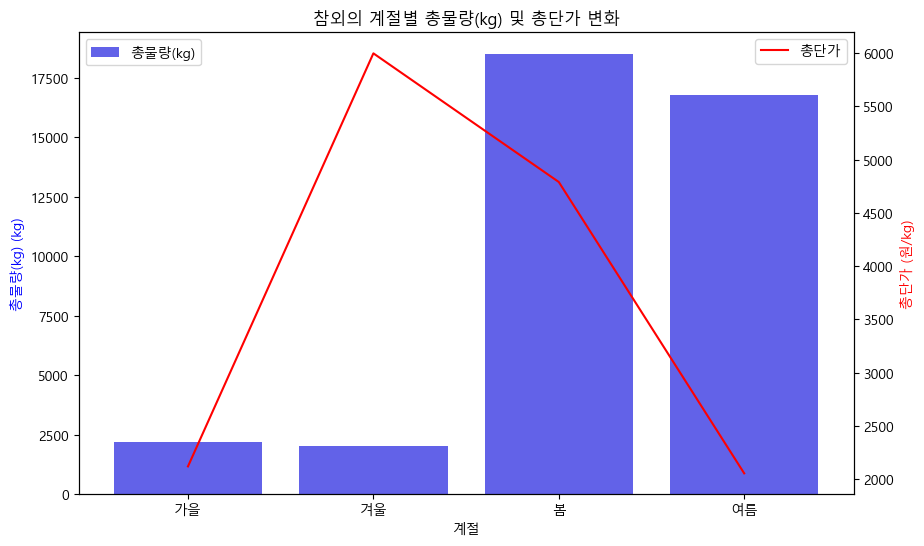

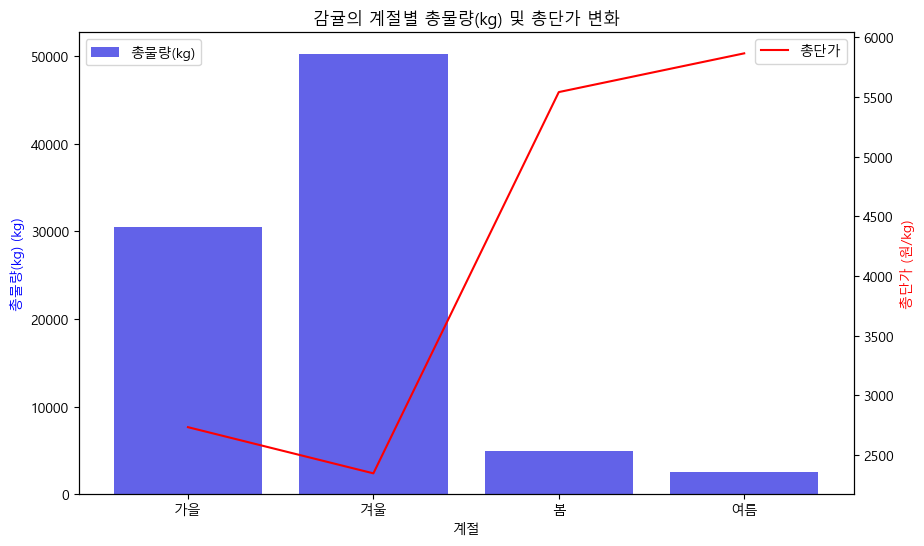

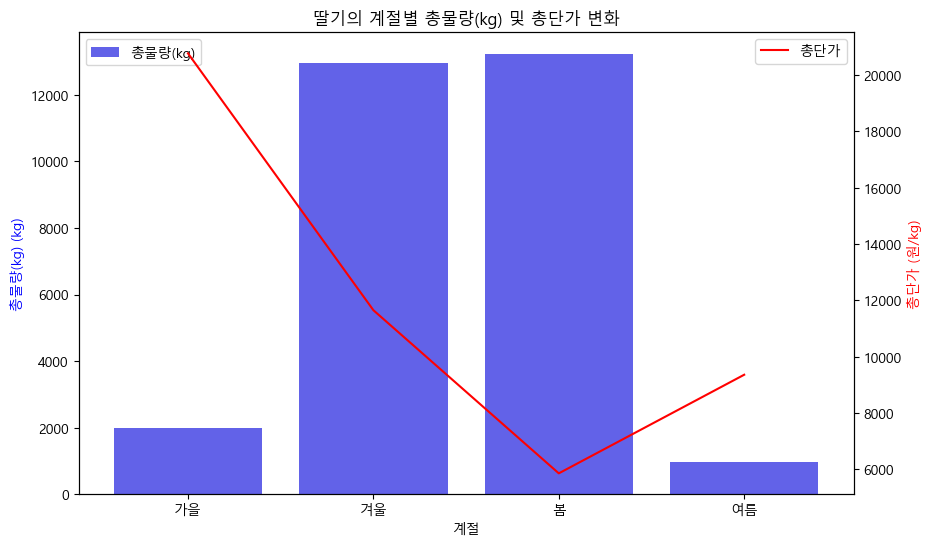

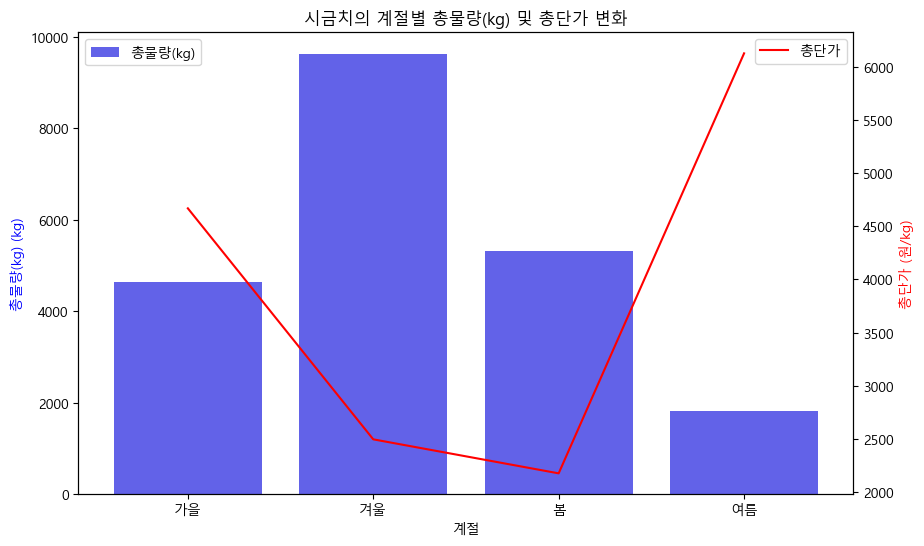

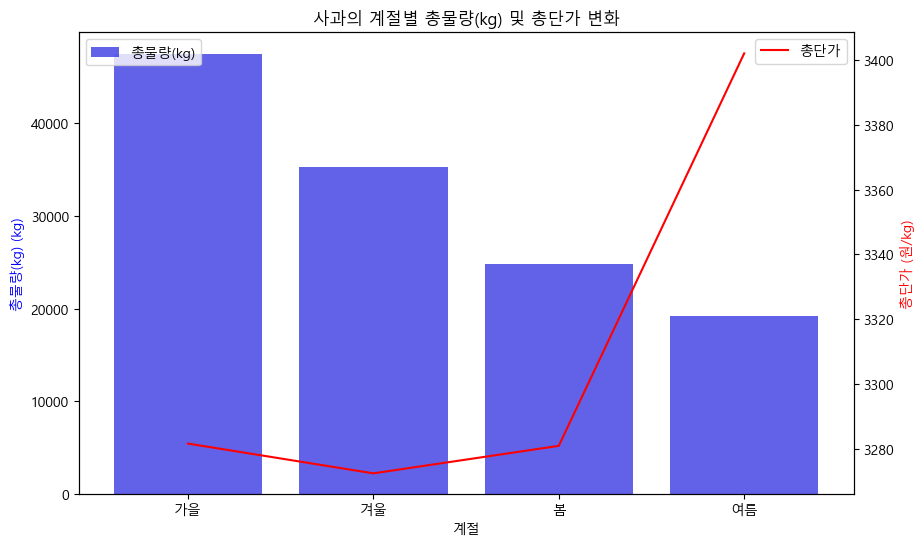

In [43]:
# 특정 품목의 계절별 데이터 추출 함수
def analyze_seasonal_pattern(item_name):
    # 품목별 계절 데이터 필터링 및 집계
    item_seasonal_data = filtered_df.loc[filtered_df.loc[:, 'item'] == item_name] \
        .groupby(filtered_df.loc[:, 'season'])[['quantity_kg', 'unit_price_per_kg']].mean().reset_index()

    # 시각화
    plt.figure(figsize=(10, 6))

    # 계절별 총물량(kg) (막대그래프)
    sns.barplot(data=item_seasonal_data, x='season', y='quantity_kg', color='blue', alpha=0.7, label='총물량(kg)')

    # 계절별 총단가 (선그래프)
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    sns.lineplot(data=item_seasonal_data, x='season', y='unit_price_per_kg', ax=ax2, color='red', label='총단가')

    # 제목 및 축 레이블 설정
    ax1.set_title(f'{item_name}의 계절별 총물량(kg) 및 총단가 변화')
    ax1.set_xlabel('계절')
    ax1.set_ylabel('총물량(kg) (kg)', color='blue')
    ax2.set_ylabel('총단가 (원/kg)', color='red')

    # 범례 추가
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

analyze_seasonal_pattern('복숭아')
analyze_seasonal_pattern('수박')
analyze_seasonal_pattern('포도')
analyze_seasonal_pattern('오이')
analyze_seasonal_pattern('참외')
analyze_seasonal_pattern('감귤')
analyze_seasonal_pattern('딸기')
analyze_seasonal_pattern('시금치')
analyze_seasonal_pattern('사과')


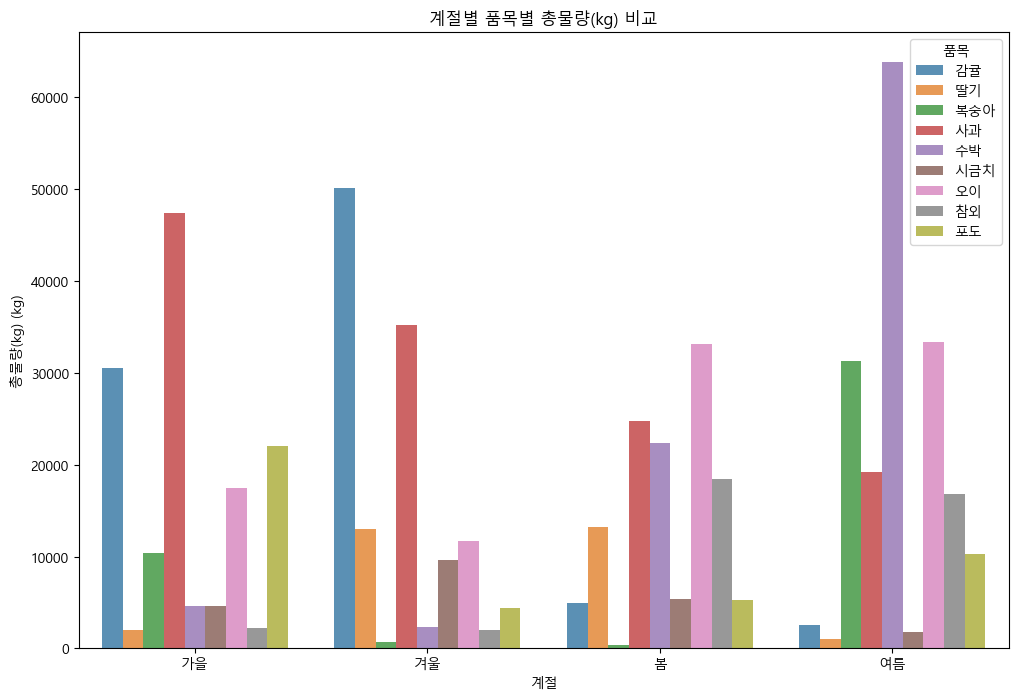

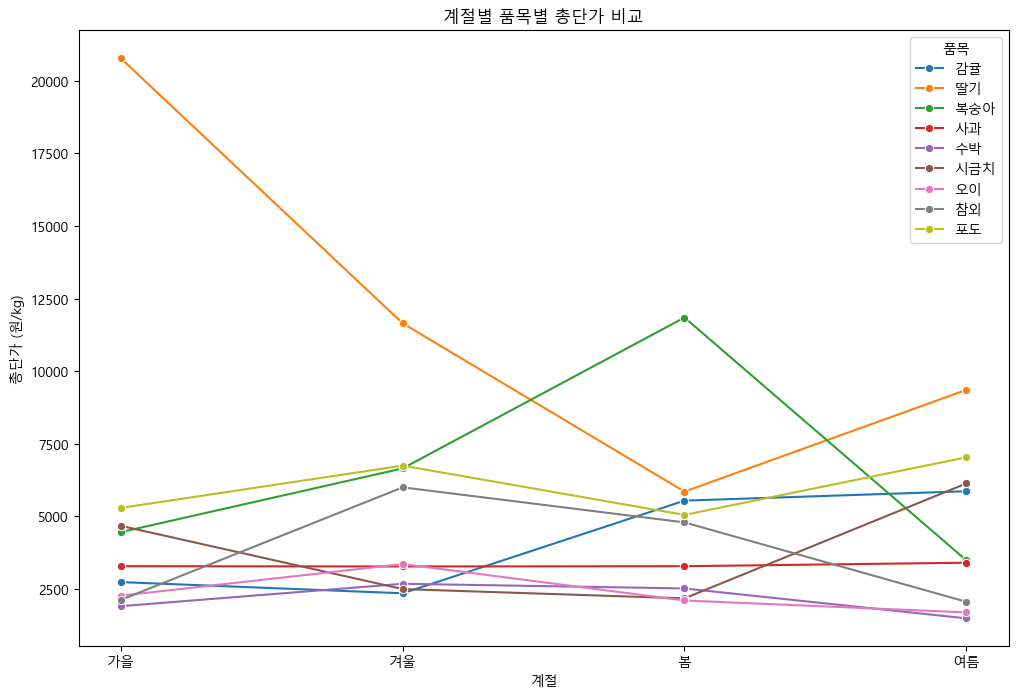

In [44]:
# 여러 품목의 계절별 데이터 통합
items_to_analyze = ['복숭아', '수박', '포도', '오이', '참외', '감귤', '딸기', '시금치', '사과']

# 품목별 계절 데이터 집계
seasonal_data = (
    filtered_df.loc[filtered_df.loc[:, 'item'].isin(items_to_analyze)]
    .groupby([filtered_df.loc[:, 'season'], filtered_df.loc[:, 'item']])
    [['quantity_kg', 'unit_price_per_kg']]
    .mean()
    .reset_index()
)

# 계절별 총물량(kg) 비교
plt.figure(figsize=(12, 8))
sns.barplot(
    data=seasonal_data,
    x='season',
    y='quantity_kg',
    hue='item',
    palette='tab10',
    alpha=0.8
)
plt.title('계절별 품목별 총물량(kg) 비교')
plt.xlabel('계절')
plt.ylabel('총물량(kg) (kg)')
plt.legend(title='품목', loc='upper right')
plt.show()

# 계절별 총단가 비교
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=seasonal_data,
    x='season',
    y='unit_price_per_kg',
    hue='item',
    palette='tab10',
    marker='o'
)
plt.title('계절별 품목별 총단가 비교')
plt.xlabel('계절')
plt.ylabel('총단가 (원/kg)')
plt.legend(title='품목', loc='upper right')
plt.show()


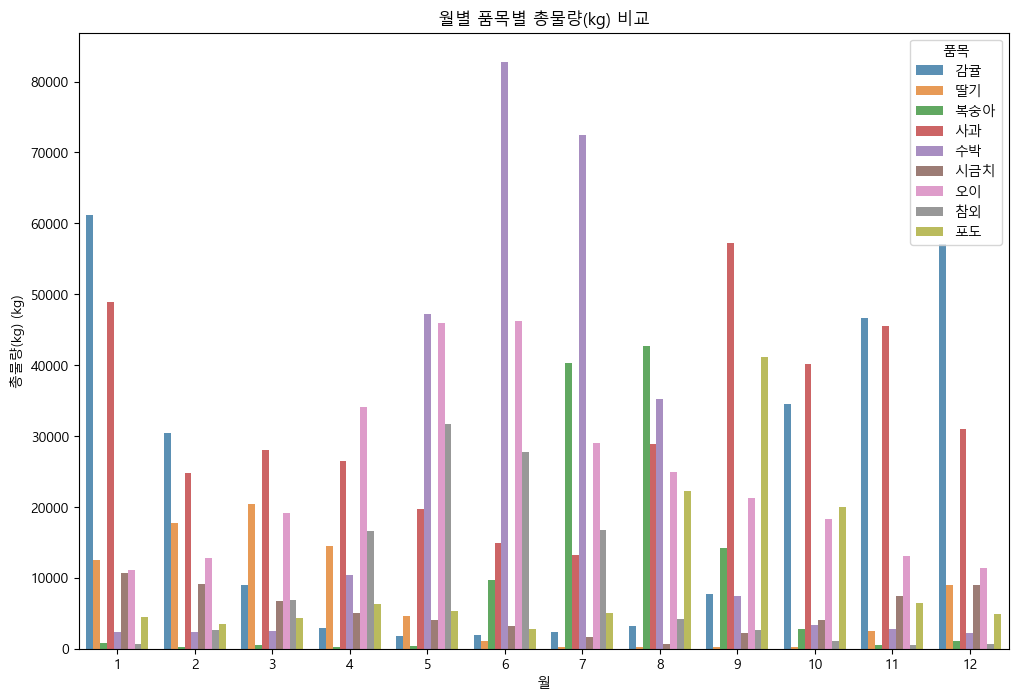

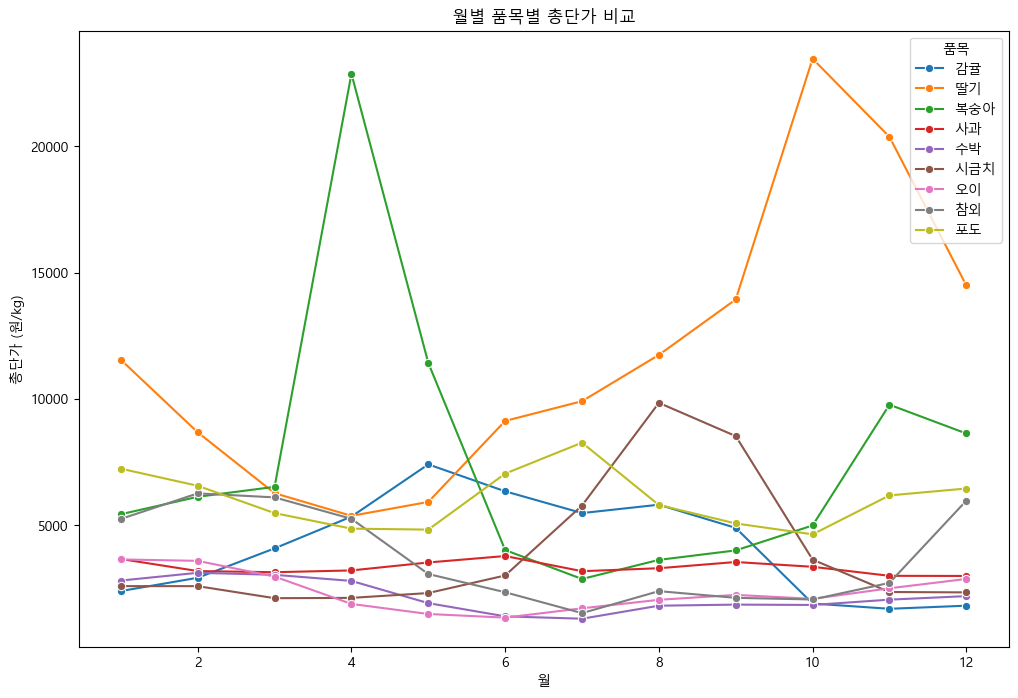

In [45]:
# 여러 품목의 월별 데이터 통합
items_to_analyze = ['복숭아', '수박', '포도', '오이', '참외', '감귤', '딸기', '시금치', '사과']

# 품목별 월 데이터 집계
seasonal_data = (
    filtered_df.loc[filtered_df.loc[:, 'item'].isin(items_to_analyze)]
    .groupby([filtered_df.loc[:, 'month'], filtered_df.loc[:, 'item']])
    [['quantity_kg', 'unit_price_per_kg']]
    .mean()
    .reset_index()
)

# 월별 총물량(kg) 비교
plt.figure(figsize=(12, 8))
sns.barplot(
    data=seasonal_data,
    x='month',
    y='quantity_kg',
    hue='item',
    palette='tab10',
    alpha=0.8
)
plt.title('월별 품목별 총물량(kg) 비교')
plt.xlabel('월')
plt.ylabel('총물량(kg) (kg)')
plt.legend(title='품목', loc='upper right')
plt.show()

# 월별 총단가 비교
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=seasonal_data,
    x='month',
    y='unit_price_per_kg',
    hue='item',
    palette='tab10',
    marker='o'
)
plt.title('월별 품목별 총단가 비교')
plt.xlabel('월')
plt.ylabel('총단가 (원/kg)')
plt.legend(title='품목', loc='upper right')
plt.show()


클러스터링 결과:
         quantity_kg  unit_price_per_kg   avg_temp  daily_rainfall  cluster
item                                                                      
감귤     22698.096935        4058.300106  14.040266        4.003743        0
감자     22573.535429        1390.037442  14.407699        4.091257        0
고구마    14403.361477        2170.726877  14.053070        3.950110        0
단감     10167.020761        2768.765305   8.695442        2.211070        2
당근     12471.704678        1328.295347  14.222223        4.033892        0
대파     22266.211534        1661.274270  14.255489        4.057542        0
딸기     10045.469322       10532.064322  10.019262        2.150133        2
마늘      5340.966127        4704.164877  14.359747        4.014587        0
무      49682.838487         597.903372  14.224076        4.051667        0
바나나    15609.890661        1848.230791  14.256415        4.036388        0
방울토마토   6659.331074        4790.994876  14.315369        4.052450        0
배      11574.6

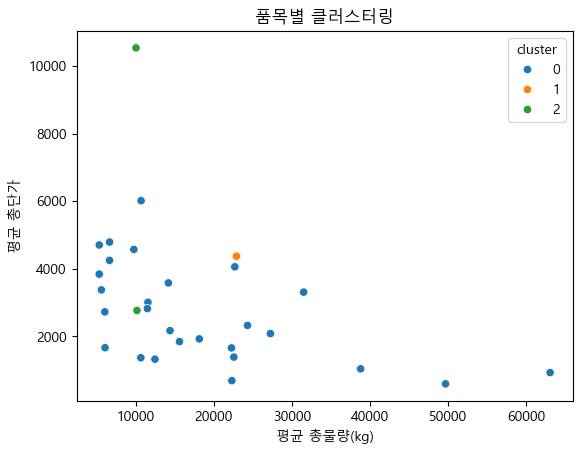

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 품목별 평균 데이터 추출
item_summary = filtered_df.groupby('item')[['quantity_kg', 'unit_price_per_kg', 'avg_temp', 'daily_rainfall']].mean()

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(item_summary)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
item_summary['cluster'] = kmeans.fit_predict(scaled_data)

print("클러스터링 결과:\n", item_summary)

sns.scatterplot(data=item_summary, x='quantity_kg', y='unit_price_per_kg', hue='cluster', palette='tab10')
plt.title('품목별 클러스터링')
plt.xlabel('평균 총물량(kg)')
plt.ylabel('평균 총단가')
plt.show()

In [47]:
# 클러스터 분포
# 0 (파란색):대부분 평균 거래량이 낮고 단가도 낮은 품목들로 구성
# 1 (주황색):평균 거래량이 낮으나 단가가 높은 품목들
# 2 (초록색):거래량이 상대적으로 높으며 단가는 낮은 품목들


지역과 품목을 포함한 클러스터링 결과:
              quantity_kg  unit_price_per_kg   avg_temp  daily_rainfall  \
region item                                                              
강릉     감귤    4090.070089        4309.953475  14.386942        4.679688   
       감자    3264.810606        1411.037121  14.973382        4.873485   
       고구마    836.172764        2960.587392  14.861213        4.730488   
       단감    1112.049538        3488.595000   9.952309        3.883834   
       당근    1380.776102        1964.493751  15.248376        5.002088   
...                  ...                ...        ...             ...   
포항     참외    4262.636704        3793.017022  18.714139        4.071910   
       토마토   5484.567847        2560.659876  15.690332        3.694042   
       포도    3840.592970        6266.571580  15.699100        3.704106   
       풋고추    528.174127        4438.788939  15.793314        3.688242   
       호박    1477.117696        1639.832431  15.840300        3.737933   

             

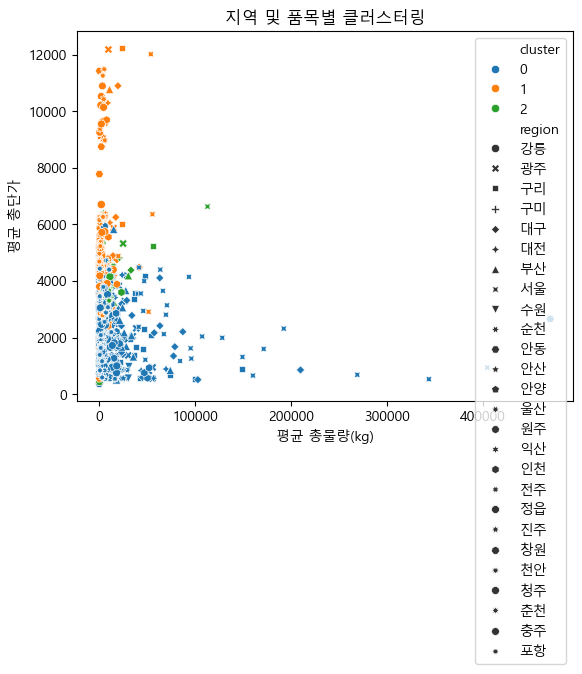

In [48]:
item_summary = filtered_df.groupby(['region', 'item'])[['quantity_kg', 'unit_price_per_kg', 'avg_temp', 'daily_rainfall']].mean()

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(item_summary)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
item_summary['cluster'] = kmeans.fit_predict(scaled_data)

print("\n지역과 품목을 포함한 클러스터링 결과:\n", item_summary)

sns.scatterplot(data=item_summary.reset_index(), x='quantity_kg', y='unit_price_per_kg', hue='cluster', palette='tab10', style='region')
plt.title('지역 및 품목별 클러스터링')
plt.xlabel('평균 총물량(kg)')
plt.ylabel('평균 총단가')
plt.show()


In [49]:
# 0 (파란색):거래량이 높은 품목들, 단가는 낮은 경향
# 1 (주황색):거래량이 낮지만 단가가 높은 품목들
# 2 (초록색):거래량이 중간 정도이며 단가도 중간 수준

In [50]:
# 클러스터별 주요 품목
cluster_summary = filtered_df.groupby(['cluster', 'region', 'item'])['quantity_kg'].sum().reset_index()
cluster_summary.sort_values(by=['cluster', 'quantity_kg'], ascending=False, inplace=True)
print(cluster_summary.head(10))  # 클러스터별 상위 품목


KeyError: 'cluster'

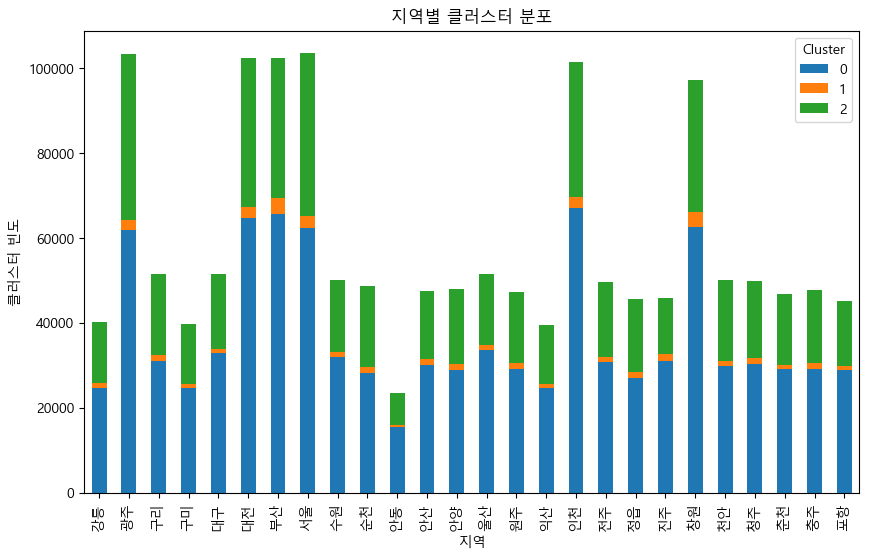

In [135]:
# 지역별 클러스터 비율 분석
region_cluster_dist = filtered_df.groupby(['region', 'cluster']).size().unstack(fill_value=0)
region_cluster_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('지역별 클러스터 분포')
plt.xlabel('지역')
plt.ylabel('클러스터 빈도')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# 0 (파란색): 대부분 지역에서 높은 비중 차지. 평균 거래량이 많고 단가가 낮은 품목들이 주요 데이터임을 시사.
# 1 (주황색): 상대적으로 낮은 비율. 몇몇 지역에서 두드러질 수 있음.
# 2 (초록색): 특정 지역. 고거래량 품목들이 포함될 가능성.

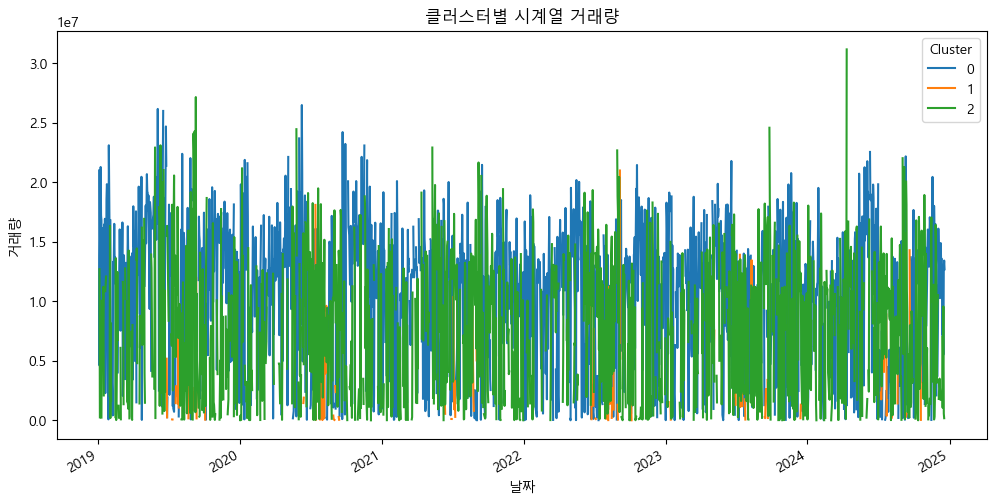

In [136]:
# 특정 클러스터에서 거래량이 많은 품목들의 시계열 변화 분석

cluster_time_series = filtered_df.groupby(['cluster', 'date'])['quantity_kg'].sum().unstack()
cluster_time_series.T.plot(figsize=(12, 6))
plt.title('클러스터별 시계열 총물량(kg)')
plt.xlabel('날짜')
plt.ylabel('총물량(kg)')
plt.legend(title='Cluster')
plt.show()


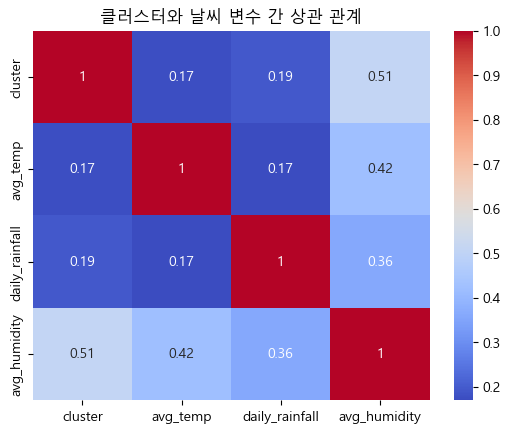

In [153]:
# 날씨 데이터가 클러스터에 영향을 미치는지
corr_matrix = filtered_df[['cluster', 'avg_temp', 'daily_rainfall', 'avg_humidity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('클러스터와 날씨 변수 간 상관 관계')
plt.show()

In [139]:
cluster_volatility = filtered_df.groupby('cluster')['quantity_kg'].std()
print(cluster_volatility)


cluster
0    57034.664562
1    55660.799341
2    64975.427670
Name: quantity_kg, dtype: float64


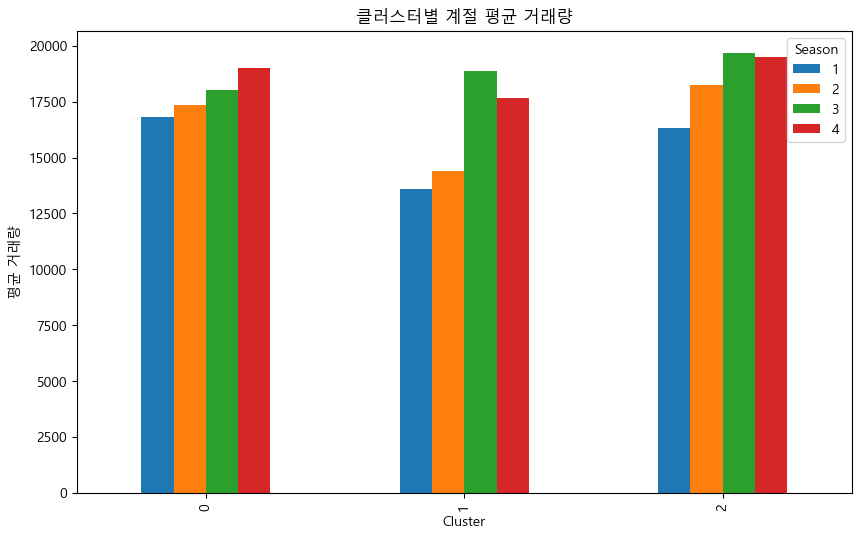

In [140]:
# 계절별로 각 클러스터의 평균 거래량을 계산
filtered_df['season'] = filtered_df['date'].apply(lambda x: (x.month % 12 + 3) // 3)  # 1=봄, 2=여름, 3=가을, 4=겨울
season_cluster = filtered_df.groupby(['cluster', 'season'])['quantity_kg'].mean().unstack()
season_cluster.plot(kind='bar', figsize=(10, 6))
plt.title('클러스터별 계절 평균 총물량(kg)')
plt.xlabel('Cluster')
plt.ylabel('평균 총물량(kg)')
plt.legend(title='Season')
plt.show()


In [ ]:
# 각 클러스터에서 품목별 거래량이 변동성에 미치는 영향
cluster_item_variance = filtered_df.groupby(['cluster', 'item'])['quantity_kg'].std().reset_index()
cluster_item_variance = cluster_item_variance.sort_values(by='quantity_kg', ascending=False)
print(cluster_item_variance.head(10))  # 변동성이 큰 품목 확인


    cluster item    quantity_kg
81        2   양파  149892.695204
21        0   양파  142143.570731
67        2   마늘  142029.459230
51        1   양파  137752.922728
68        2    무  119195.103265
8         0    무  118028.692758
38        1    무  114052.906355
15        0   사과  103923.253192
75        2   사과  102344.093368
72        2   배추   96468.888876


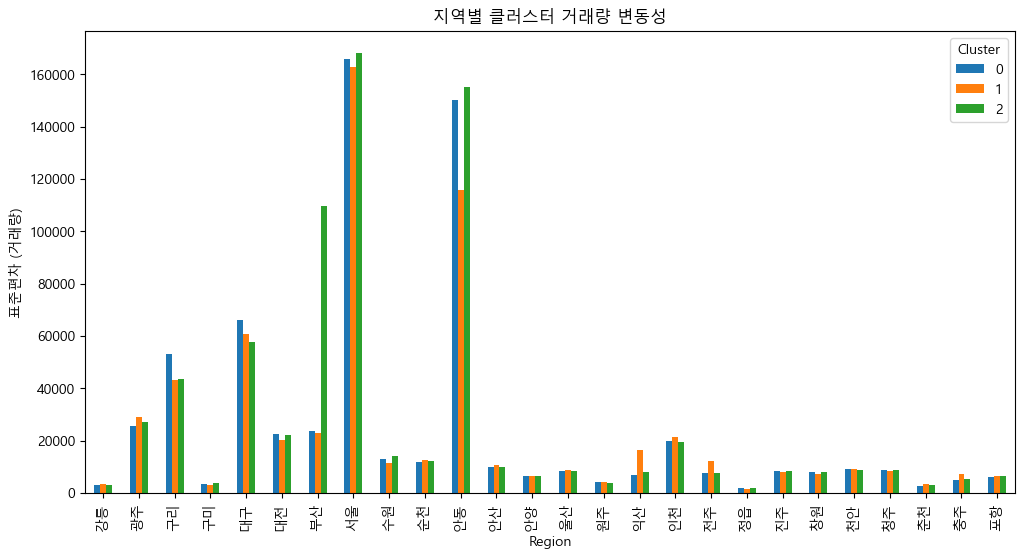

In [145]:
# 지역별 클러스터 거래량의 변동성 비교
region_cluster_variance = filtered_df.groupby(['region', 'cluster'])['quantity_kg'].std().unstack()
region_cluster_variance.plot(kind='bar', figsize=(12, 6))
plt.title('지역별 클러스터 총물량(kg) 변동성')
plt.xlabel('Region')
plt.ylabel('표준편차 (총물량(kg))')
plt.legend(title='Cluster')
plt.show()


In [154]:
# 각 지역에서 클러스터별 변동성에 가장 큰 기여를 하는 품목
region_item_variance = filtered_df.groupby(['region', 'cluster', 'item'])['quantity_kg'].std().reset_index()
region_item_variance = region_item_variance.sort_values(by='quantity_kg', ascending=False)
print(region_item_variance.head(20))  # 상위 변동 품목


    region  cluster item    quantity_kg
607     부산        2   마늘  570956.651262
651     서울        0   양파  385519.099200
711     서울        2   양파  375416.910843
681     서울        1   양파  349359.287407
964     안동        2   사과  323462.618731
914     안동        0   사과  308639.472107
638     서울        0    무  305655.265776
939     안동        1   사과  301337.829650
668     서울        1    무  297918.649447
698     서울        2    무  297569.067138
642     서울        0   배추  245190.661813
702     서울        2   배추  240422.570836
672     서울        1   배추  235808.970875
714     서울        2   오이  218627.191593
654     서울        0   오이  218380.624627
673     서울        1  복숭아  199915.319650
684     서울        1   오이  187550.944629
708     서울        2   수박  186266.571361
362     대구        0  고구마  185660.521389
678     서울        1   수박  185062.173594


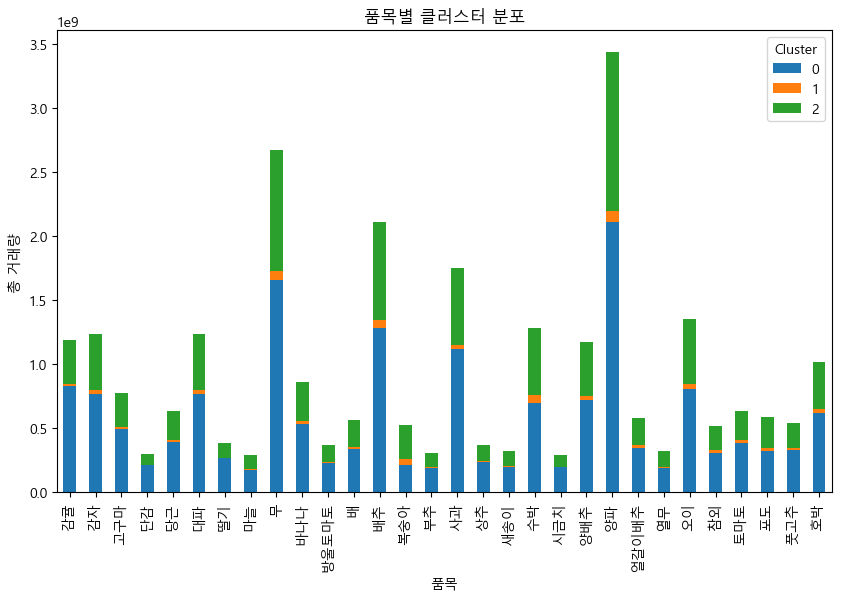

In [148]:
# 품목별 클러스터 패턴 분석
item_cluster_dist = filtered_df.groupby(['item', 'cluster'])['quantity_kg'].sum().unstack()
item_cluster_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('품목별 클러스터 분포')
plt.xlabel('품목')
plt.ylabel('총 총물량(kg)')
plt.legend(title='Cluster')
plt.show()


In [149]:
# 각 지역에서 거래량이 많은 주요 품목들
region_top_items = filtered_df.groupby(['region', 'item'])['quantity_kg'].sum().reset_index()
region_top_items = region_top_items.sort_values(by='quantity_kg', ascending=False)
print(region_top_items.head(10))  # 지역별 상위 품목


    region item   quantity_kg
231     서울   양파  1.461563e+09
218     서울    무  1.250693e+09
222     서울   배추  9.796236e+08
315     안동   사과  8.469339e+08
234     서울   오이  7.007178e+08
215     서울   대파  6.245282e+08
230     서울  양배추  5.829458e+08
211     서울   감자  5.372206e+08
239     서울   호박  4.671659e+08
141     대구   양파  3.806415e+08


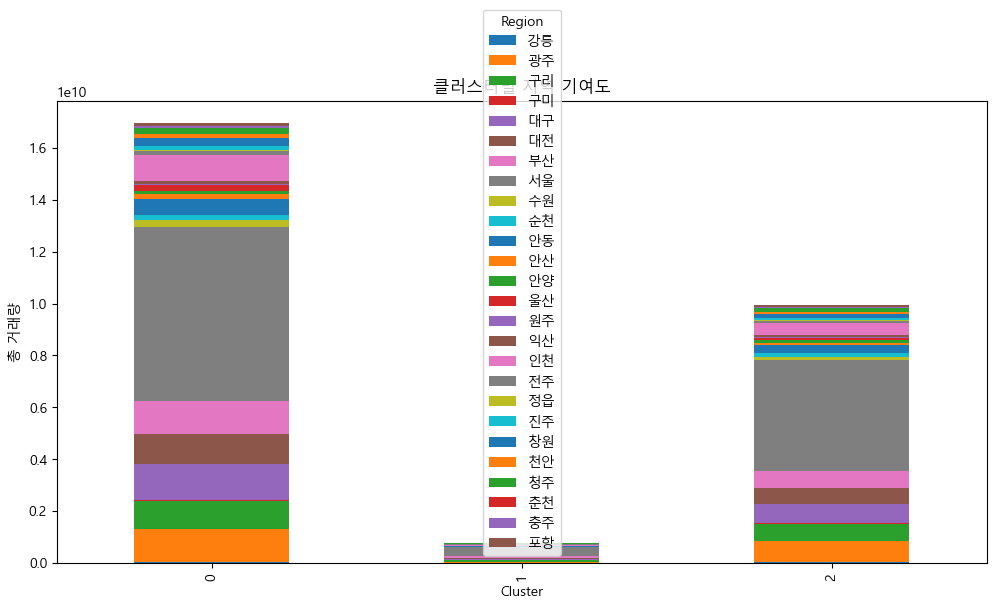

In [150]:
# 클러스터별로 특정 지역이 거래량에 얼마나 기여하는지
cluster_region_dist = filtered_df.groupby(['cluster', 'region'])['quantity_kg'].sum().unstack()
cluster_region_dist.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('클러스터별 지역 기여도')
plt.xlabel('Cluster')
plt.ylabel('총 총물량(kg)')
plt.legend(title='Region')
plt.show()


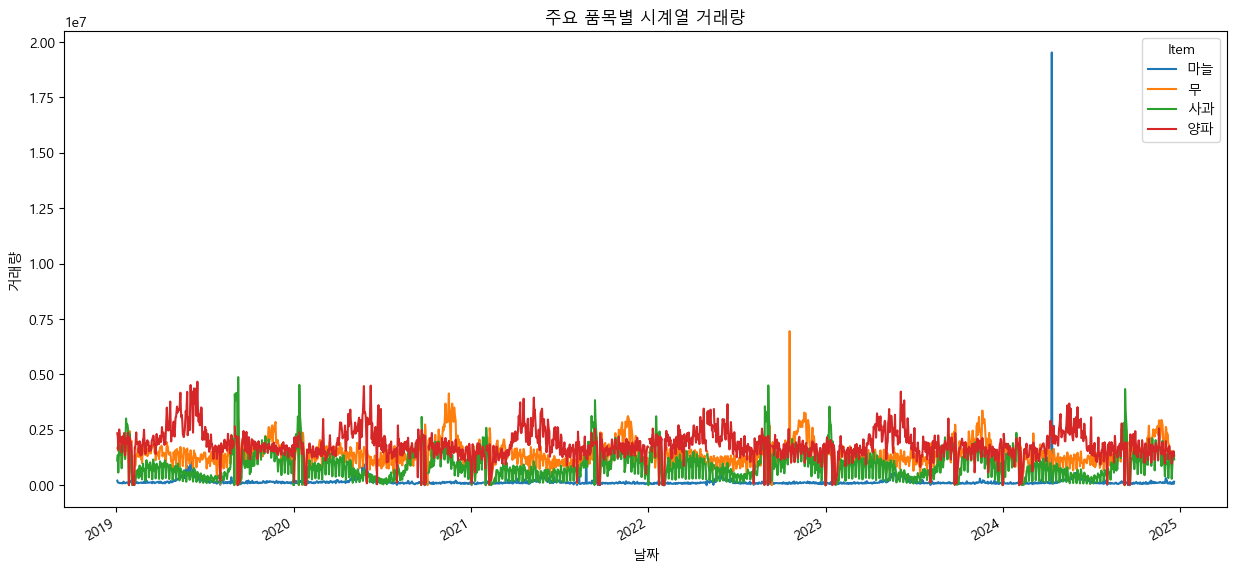

In [151]:
# 양파, 무, 사과, 마늘 등 주요 품목 중심으로 시간에 따른 총물량(kg) 변화 분석
item_time_series = filtered_df[filtered_df['item'].isin(['양파', '무', '사과', '마늘'])].groupby(['item', 'date'])['quantity_kg'].sum().unstack()
item_time_series.T.plot(figsize=(15, 7))
plt.title('시간에 따른 주요 품목별 총물량(kg)')
plt.xlabel('날짜')
plt.ylabel('총물량(kg)')
plt.legend(title='Item')
plt.show()


In [1]:
# 모든 품목 선택
item_time_series = filtered_df.groupby(['item', 'date'])['quantity_kg'].sum().unstack()

item_time_series.T.plot(figsize=(15, 7))
plt.title('시간에 따른 30개 품목별 총물량(kg) 변화')
plt.xlabel('날짜')
plt.ylabel('총물량(kg)')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()


NameError: name 'filtered_df' is not defined

In [180]:
# 총물량(kg) 이상치 필터링
threshold = 1e7  # 예: 총물량(kg) 1천만 kg 이상
outliers = filtered_df[filtered_df['quantity_kg'] > threshold]
print(outliers[['date', 'item', 'quantity_kg', 'region', 'season']])


              date item  quantity_kg region  season
5014068 2024-04-11   마늘   19406787.5     부산       2


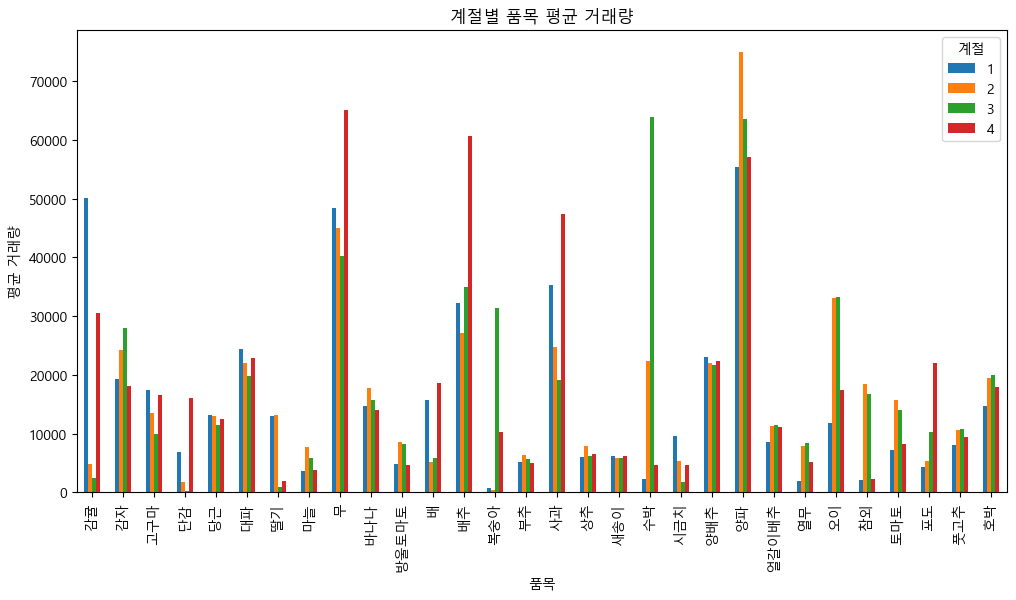

In [ ]:
season_quantity = filtered_df.groupby(['season', 'item'])['quantity_kg'].mean().unstack()
season_quantity.T.plot(kind='bar', figsize=(12, 6))
plt.title("계절별 품목 평균 총물량(kg)")
plt.xlabel("품목")
plt.ylabel("평균 총물량(kg)")
plt.legend(title="계절")
plt.show()


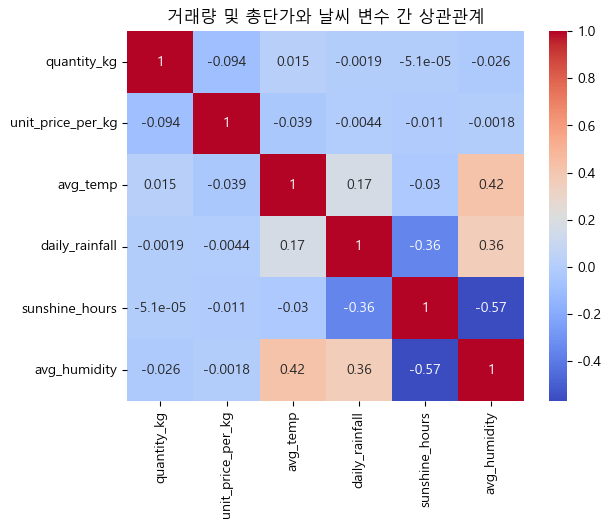

In [ ]:
corr_matrix = filtered_df[['quantity_kg', 'unit_price_per_kg', 'avg_temp', 'daily_rainfall', 'sunshine_hours', 'avg_humidity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("총물량(kg) 및 총단가와 날씨 변수 간 상관관계")
plt.show()

In [ ]:
# quantity_kg와 날씨 변수들 간의 상관 관계는 약하거나 거의 없음
# avg_temp와 avg_humidity는 양의 상관 관계
# avg_humidity와 sunshine_hours는 강한 음의 상관 관계
# 특정 품목은 계절적 영향을 강하게 받음
# 일부 품목(양파, 배추)은 계절과 관계없이 안정적인 총물량(kg) 유지

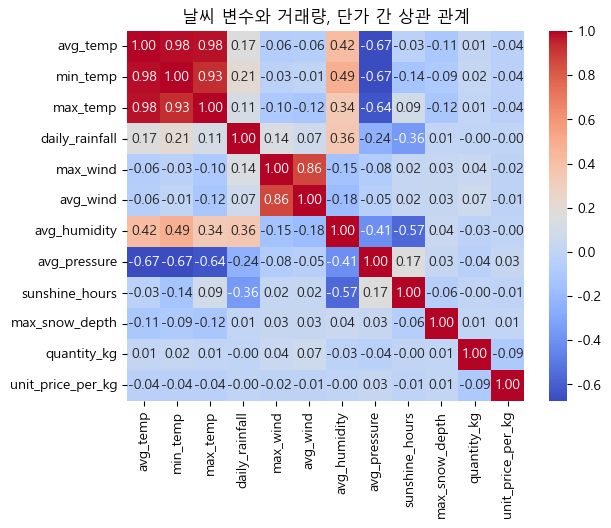

In [162]:
# 날씨 변수와 총물량(kg) 간 상관 관계
weather_columns = ['avg_temp', 'min_temp', 'max_temp', 'daily_rainfall', 'max_wind',  'avg_wind', 'avg_humidity', 'avg_pressure', 'sunshine_hours', 'max_snow_depth']

corr_matrix = filtered_df[weather_columns + ['quantity_kg', 'unit_price_per_kg']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("날씨 변수와 총물량(kg), 단가 간 상관 관계")
plt.show()


In [ ]:
# avg_temp, min_temp, max_temp는 서로 매우 높은 상관관계
# daily_rainfall은 다른 변수들과의 상관관계가 낮음
# max_wind와 avg_wind는 강한 양의 상관관계
# sunshine_hours와 avg_humidity는 강한 음의 상관관계
# 거래량은 모든 날씨 변수와 약한 상관관계
# 총단가는 모든 변수와 거의 상관관계가 없음

In [167]:
# PCA(주성분 분석) : 다중 공선성을 해결 위함

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 온도 관련 변수 선택
temp_features = ['avg_temp', 'min_temp', 'max_temp']

# 데이터 스케일링
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(filtered_df[temp_features])

# PCA 적용
pca = PCA(n_components=1)  # 주성분 1개 생성
principal_component = pca.fit_transform(scaled_temp)

# 결과를 데이터프레임에 추가
filtered_df['temp_principal_component'] = principal_component


In [168]:
# 주성분 설명력 확인
explained_variance = pca.explained_variance_ratio_
print(f"PCA로 설명된 분산 비율: {explained_variance[0]:.2f}")

PCA로 설명된 분산 비율: 0.98


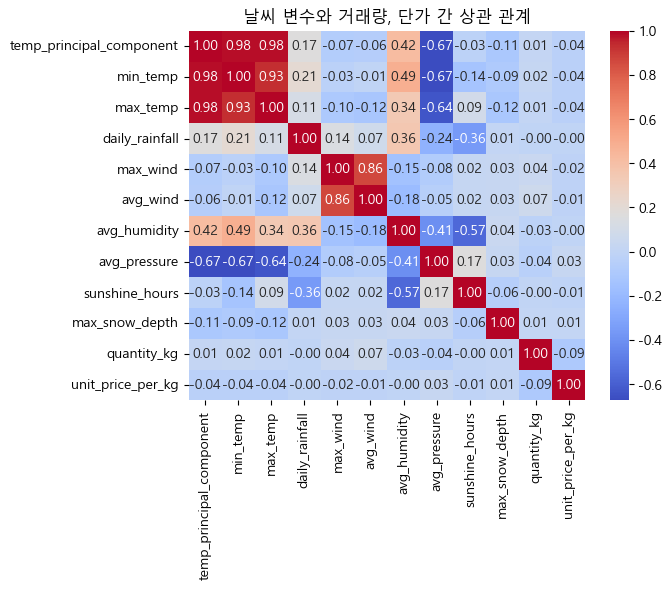

In [ ]:
# PCA 주성분을 포함한 날씨 변수와 총물량(kg) 간 상관 관계
weather_columns = ['temp_principal_component', 'min_temp', 'max_temp', 'daily_rainfall', 'max_wind',  'avg_wind', 'avg_humidity', 'avg_pressure', 'sunshine_hours', 'max_snow_depth']

corr_matrix = filtered_df[weather_columns + ['quantity_kg', 'unit_price_per_kg']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("날씨 변수와 총물량(kg), 단가 간 상관 관계")
plt.show()

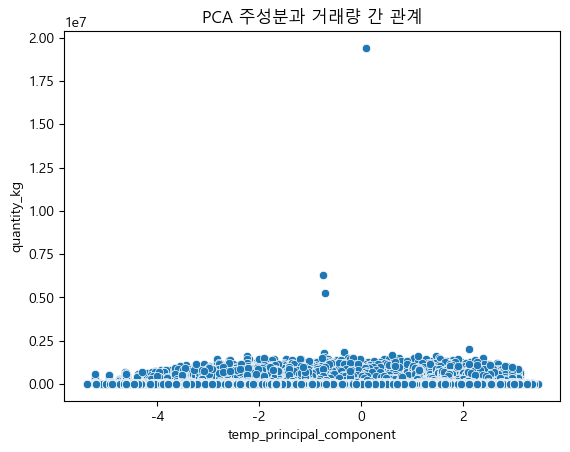

In [173]:
# PCA 주성분과 총물량(kg) 간 비선형 관계 탐색
sns.scatterplot(data=filtered_df, x='temp_principal_component', y='quantity_kg')
plt.title("PCA 주성분과 총물량(kg) 간 관계")
plt.show()
